# 90%  - #1 no explanation, #2 no explanation

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/GitHub
%cd 'soil-physics-theory'
%cd 'content/chapter-6'

Mounted at /content/drive
/content/drive/MyDrive/GitHub
/content/drive/MyDrive/GitHub/soil-physics-theory
/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-6


Plot ‘typical’ hydraulic conductivity for sand, silt loam and clay soil as a function of water potential using data from Table 6.1 and eqn (6.34). Use a log–log scale and plot both saturated and unsaturated conductivity. Use the graphs to determine the water potential at which water would flow from silt loam into sand in a layered profile with infiltration.

In [ ]:
import numpy as np

In [ ]:

#For sand
psi_e = -0.7 # J/kg
b = 1.7
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
psi = np.logspace(0, 3, 100) # logarithmic sequence of psi values
Ksand = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

In [ ]:

#For silt loam
psi_e = -2.1 # J/kg
b = 4.7
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
KsiltLoam = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

In [ ]:

#For clay
psi_e = -3.7 # J/kg
b = 7.6
theta_s = 0.5 # m3/m3
K_s = 0.07*(theta_s*(1-(-psi_e/33)**(1/b)))**4 #Eq. 6.34, cm/s
Kclay = np.piecewise(-psi, [-psi < psi_e, -psi >= psi_e], [lambda x: K_s*(psi_e/x)**(2+3/b), K_s])

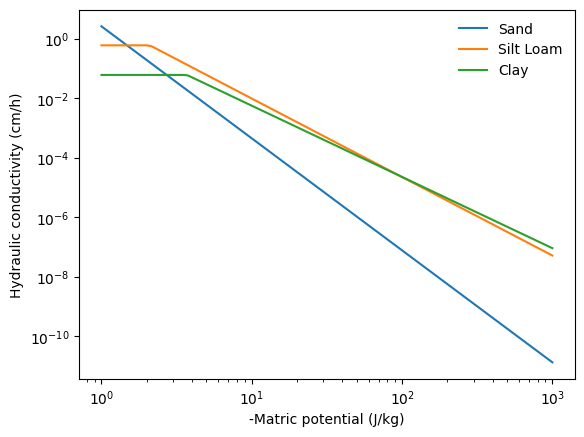

In [ ]:

#Plot results
import matplotlib.pyplot as plt
plt.loglog(psi,Ksand*3600)
plt.loglog(psi,KsiltLoam*3600)
plt.loglog(psi,Kclay*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.legend(['Sand', 'Silt Loam', 'Clay'], frameon=False)
plt.legend
plt.show()

6.2. Write a Python function to compute saturated hydraulic conductivity from bulk density, silt fraction and clay fraction. Use your program to show how tillage affects hydraulic conductivity (assuming that tillage decreases the bulk density).

In [ ]:
from PSP_hydraulicConductivity import *

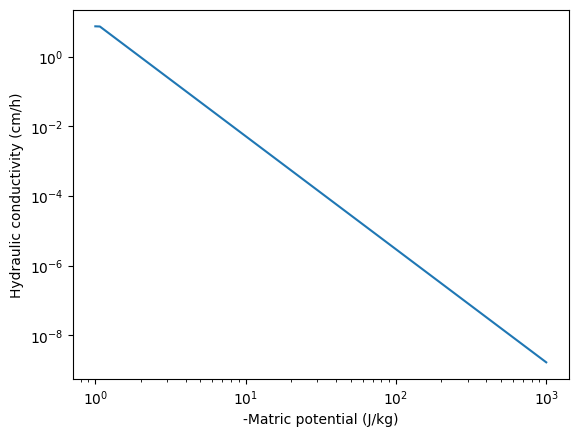

In [ ]:

silt = 0.1 # mass fraction of silt (g/g)
clay = 0.1 # mass fraction of clay (g/g)
bulkDensity = 1200. # bulk density (kg/m^3)
K, psi = hydraulicConductivity(silt,clay,bulkDensity)

plt.loglog(psi,K*3600)
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.show()

In [ ]:
K

array([2.09746800e-03, 2.07286047e-03, 1.65235081e-03, 1.31714761e-03,
       1.04994521e-03, 8.36948674e-04, 6.67161559e-04, 5.31818210e-04,
       4.23931213e-04, 3.37930649e-04, 2.69376541e-04, 2.14729623e-04,
       1.71168621e-04, 1.36444596e-04, 1.08764841e-04, 8.67003237e-05,
       6.91119120e-05, 5.50915634e-05, 4.39154449e-05, 3.50065632e-05,
       2.79049768e-05, 2.22440496e-05, 1.77315232e-05, 1.41344278e-05,
       1.12670552e-05, 8.98137049e-06, 7.15936989e-06, 5.70698841e-06,
       4.54924346e-06, 3.62636379e-06, 2.89070357e-06, 2.30428264e-06,
       1.83682566e-06, 1.46419907e-06, 1.16716516e-06, 9.30388867e-07,
       7.41646060e-07, 5.91192456e-07, 4.71260536e-07, 3.75658536e-07,
       2.99450782e-07, 2.38702870e-07, 1.90278549e-07, 1.51677799e-07,
       1.20907769e-07, 9.63798837e-08, 7.68278336e-08, 6.12421990e-08,
       4.88183353e-08, 3.89148316e-08, 3.10203965e-08, 2.47274615e-08,
       1.97111391e-08, 1.57124501e-08, 1.25249529e-08, 9.98408548e-09,
      